In [31]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [34]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_count=0
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        city_count+=1
# Print the city count to confirm sufficient count
print(f"total {city_count} cities")

total 583 cities


## Perform API Calls

In [35]:
# OpenWeatherMap API Key
data=[]
city_no=0
for city in cities:
    url ="http://api.openweathermap.org/data/2.5/weather?appid="+api_key+"&units=Imperial" +"&q="+ city
    response = requests.get(url).json()

    try:
        city_no+=1
        print(f"city no {city_no},{city}")
        res = {
            'lat': response['coord']['lat'],
            'temp': response['main']['temp'],
            'humidity': response['main']['humidity'],
            'cloudiness': response['clouds']['all'],
            'wind_speed': response['wind']['speed']
        }
        data.append(res) 
    except Exception:
        print(f"city {city} not found")

city no 1,mataura
city no 2,arraial do cabo
city no 3,hilo
city no 4,cervo
city no 5,albany
city no 6,ancud
city no 7,illoqqortoormiut
city illoqqortoormiut not found
city no 8,torbay
city no 9,ushuaia
city no 10,along
city no 11,aktyubinskiy
city no 12,jamestown
city no 13,zhigansk
city no 14,kupino
city no 15,asau
city asau not found
city no 16,balabac
city no 17,barentsburg
city barentsburg not found
city no 18,egvekinot
city no 19,bubaque
city no 20,waipawa
city no 21,lavrentiya
city no 22,khatanga
city no 23,busselton
city no 24,rikitea
city no 25,lebu
city no 26,georgetown
city no 27,ribeira grande
city no 28,mbanza-ngungu
city no 29,upernavik
city no 30,new norfolk
city no 31,ketchikan
city no 32,iqaluit
city no 33,vaini
city no 34,hermanus
city no 35,xichang
city no 36,yellowknife
city no 37,sampit
city no 38,pokrovsk
city no 39,butaritari
city no 40,mount isa
city no 41,tommot
city no 42,cape town
city no 43,coquimbo
city no 44,bosaso
city no 45,punta arenas
city no 46,thompso

city no 349,vaitupu
city vaitupu not found
city no 350,caravelas
city no 351,achisay
city achisay not found
city no 352,solovetskiy
city solovetskiy not found
city no 353,poopo
city no 354,qurunbaliyah
city qurunbaliyah not found
city no 355,vostok
city no 356,coracora
city no 357,inirida
city no 358,ritchie
city no 359,kieta
city no 360,baker city
city no 361,general roca
city no 362,bathsheba
city no 363,springdale
city no 364,togur
city no 365,sing buri
city no 366,beira
city no 367,placido de castro
city no 368,powder springs
city no 369,mallama
city mallama not found
city no 370,namibe
city no 371,daru
city no 372,los alamos
city no 373,acapulco
city no 374,jaipur hat
city jaipur hat not found
city no 375,krasnaya gora
city no 376,stuttgart
city no 377,marzuq
city no 378,vytegra
city no 379,ravar
city no 380,palabuhanratu
city palabuhanratu not found
city no 381,timizart
city no 382,montesarchio
city no 383,monroe
city no 384,zambezi
city no 385,port hedland
city no 386,ahipara
ci

In [36]:
data_df=pd.DataFrame(data)
data_df.head()

,cloudiness,humidity,lat,temp,wind_speed
0,92,95,-46.19,33.72,3.36
1,0,54,-22.97,77.83,13.87
2,1,33,19.71,73.53,13.87
3,12,64,-22.19,71.16,6.60
4,1,47,42.65,78.78,6.93


In [37]:
lat=data_df["lat"]
temp=data_df["temp"]
humidity=data_df["humidity"]
wind_speed=data_df["wind_speed"]
cloudiness=data_df["cloudiness"]

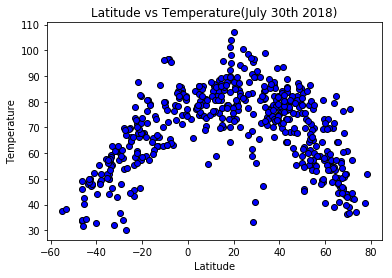

In [38]:
plt.scatter(lat,temp,marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude vs Temperature(July 30th 2018)")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig("../Images/July_30_lat_vs temp.png")

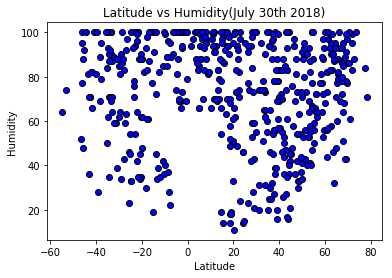

In [39]:
plt.scatter(lat,humidity,marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude vs Humidity(July 30th 2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("../Images/July_30_lat_vs_humidity.png")

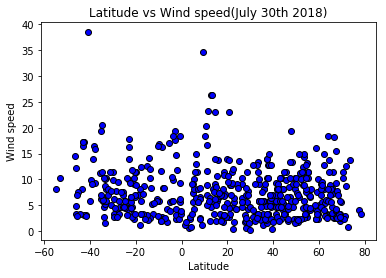

In [40]:
plt.scatter(lat,wind_speed,marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude vs Wind speed(July 30th 2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind speed")
plt.savefig("../Images/July_30_lat_vs_windspeed.png")

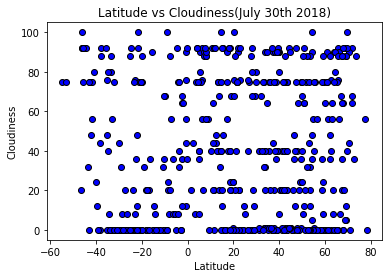

In [41]:
plt.scatter(lat,cloudiness,marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude vs Cloudiness(July 30th 2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../Images/July_30_lat_vs_cloudiness.png")